In [205]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [206]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [207]:
tsla = yf.Ticker("TSLA")

In [208]:
tsla_data = tsla.history(period="max")

In [209]:
tsla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [210]:
html_data1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data  = requests.get(html_data1).text
print(data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [211]:
soup = BeautifulSoup(data, 'html.parser')

In [212]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [213]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text.strip()
    Revenue = col[1].text.strip().replace(',','').replace('$','') 
    tesla_revenue = tesla_revenue._append({"Date": Date, "Revenue": Revenue}, ignore_index=True)
    tesla_revenue.dropna(inplace=True)
last_5_rows = tesla_revenue.tail(5)
print(last_5_rows)

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


In [214]:
tesla = None
for table in soup.find_all('table'):
    if 'Quarterly Revenue' in table.get_text():
        tesla = table
        break
        
if tesla:
    tesla_annual_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    for row in tesla.find_all('tr'):
        col = row.find_all("td")
        if len(col) >= 2:
            Date = col[0].text.strip()
            Revenue = col[1].text.strip().replace(',','').replace('$','')  # Remove commas and dollar signs
            
            tesla_annual_revenue = tesla_annual_revenue._append({"Date": Date, "Revenue": Revenue}, ignore_index=True)

    tesla_annual_revenue['Revenue'] = pd.to_numeric(tesla_annual_revenue['Revenue'], errors='coerce')

    tesla_annual_revenue.dropna(inplace=True)
    last_5_rows = tesla_annual_revenue.tail(5)
    print(last_5_rows)
else:
    pass

          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
52  2009-09-30     46.0
53  2009-06-30     27.0


In [215]:
gme = yf.Ticker("GME")

In [216]:
gme_data = gme.history(period="max")

In [222]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data1  = requests.get(url).text
print(html_data1)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

In [223]:
soup1 = BeautifulSoup(html_data1, 'html.parser')

In [224]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [225]:
for row in soup1.find("tbody").find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text.strip()
    Revenue = col[1].text.strip().replace(',','').replace('$','')  # Remove commas and dollar signs
    gme_revenue = gme_revenue._append({"Date": Date, "Revenue": Revenue}, ignore_index=True)
    gme_revenue.dropna(inplace=True)
last_5_rows = gme_revenue.tail(5)
print(last_5_rows)

    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


In [220]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    Date = col[0].text.strip()
    Revenue = col[1].text.strip().replace(',','').replace('$','')  # Remove commas and dollar signs
    gme_revenue = gme_revenue._append({"Date": Date, "Revenue": Revenue}, ignore_index=True)

gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

gme_revenue.dropna(inplace=True)

print(gme_revenue)

    Date  Revenue
0   2021    53823
1   2020    31536
2   2019    24578
3   2018    21461
4   2017    11759
5   2016     7000
6   2015     4046
7   2014     3198
8   2013     2013
9   2012      413
10  2011      204
11  2010      117
12  2009      112


In [226]:
gme = None
for table in soup1.find_all('table'):
    if 'Quarterly Revenue' in table.get_text():
        gme = table
        break
        
if gme:
    gme_annual_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    for row in gme.find_all('tr'):
        col = row.find_all("td")
        if len(col) >= 2:
            Date = col[0].text.strip()
            Revenue = col[1].text.strip().replace(',','').replace('$','')  # Remove commas and dollar signs
            
            gme_annual_revenue = gme_annual_revenue._append({"Date": Date, "Revenue": Revenue}, ignore_index=True)

    gme_annual_revenue['Revenue'] = pd.to_numeric(gme_annual_revenue['Revenue'], errors='coerce')

    gme_annual_revenue.dropna(inplace=True)
    last_5_rows = gme_annual_revenue.tail(5)
    print(last_5_rows)
else:
    pass

          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


[*********************100%%**********************]  1 of 1 completed


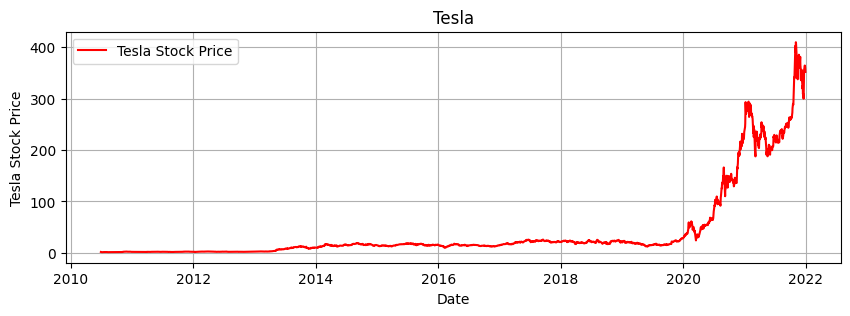

[*********************100%%**********************]  1 of 1 completed


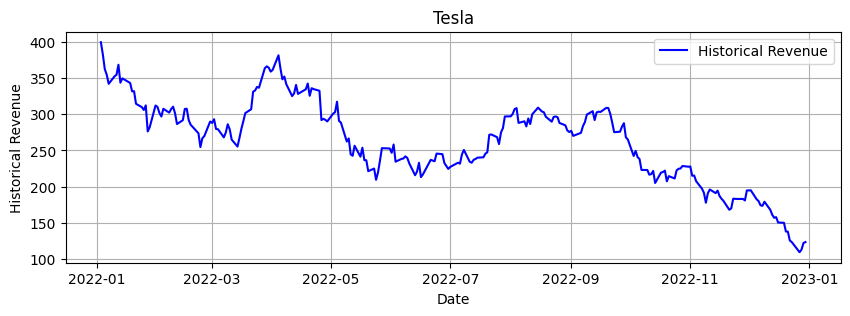

In [246]:
import matplotlib.pyplot as plt
tesla_data = yf.download('TSLA', start='2010-01-01', end='2022-01-01')
plt.figure(figsize=(10, 3))
plt.plot(tesla_data['Close'], label='Tesla Stock Price', color='red')
plt.title('Tesla')
plt.xlabel('Date')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.grid(True)
plt.show()

data = yf.download('TSLA', start='2022-01-01', end='2023-01-01')
plt.figure(figsize=(10, 3))
plt.plot(data['Close'], label='Historical Revenue', color='blue')
plt.title('Tesla')
plt.xlabel('Date')
plt.ylabel('Historical Revenue')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


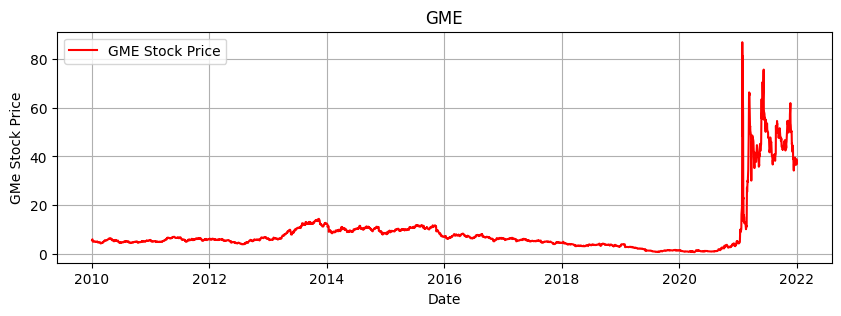

[*********************100%%**********************]  1 of 1 completed


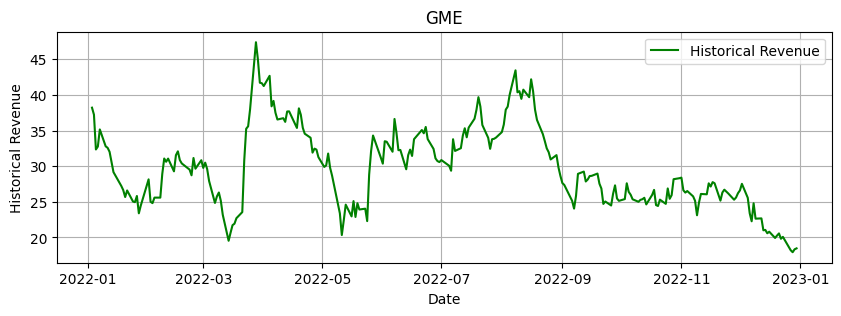

In [247]:
import matplotlib.pyplot as plt
gme_data = yf.download('GME', start='2010-01-01', end='2022-01-01')
plt.figure(figsize=(10,3 ))
plt.plot(gme_data['Close'], label='GME Stock Price', color='red')
plt.title('GME')
plt.xlabel('Date')
plt.ylabel('GMe Stock Price')
plt.legend()
plt.grid(True)
plt.show()

html_data1 = yf.download('GME', start='2022-01-01', end='2023-01-01')
plt.figure(figsize=(10,3))
plt.plot(html_data1['Close'], label='Historical Revenue', color='green')
plt.title('GME')
plt.xlabel('Date')
plt.ylabel('Historical Revenue')
plt.legend()
plt.grid(True)
plt.show()